In [2]:
import pandas as pd #type:ignore
import seaborn as sns #type:ignore
import numpy as np #type:ignore

In [5]:
listings=pd.read_csv('boston.csv')


In [7]:
listings.shape

(4426, 75)

In [8]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20241220045258,2024-12-20,previous scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.85,4.88,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20241220045258,2024-12-20,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.89,4.56,4.76,STR-490093,f,10,10,0,0,0.69
2,6695,https://www.airbnb.com/rooms/6695,20241220045258,2024-12-20,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.95,4.53,4.72,STR-491702,f,10,10,0,0,0.72
3,8789,https://www.airbnb.com/rooms/8789,20241220045258,2024-12-20,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,...,4.97,4.97,4.59,NaN,f,4,4,0,0,0.23
4,10811,https://www.airbnb.com/rooms/10811,20241220045258,2024-12-20,city scrape,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,A one-square mile neighborhood that is arguabl...,https://a0.muscache.com/pictures/45735/27548f7...,38997,...,4.00,5.00,4.67,NaN,f,13,13,0,0,0.08


In [9]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [12]:
print(listings.isnull().sum())

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               987
Length: 75, dtype: int64


In [13]:
perc= round(listings.isnull().sum()/ len(listings),2) *100
missing_columns=perc[perc>0]
missing_columns

description                       1.0
neighborhood_overview            42.0
host_location                    21.0
host_about                       32.0
host_response_time               13.0
host_response_rate               13.0
host_acceptance_rate             11.0
host_is_superhost                 3.0
host_neighbourhood                3.0
neighbourhood                    42.0
neighbourhood_group_cleansed    100.0
bathrooms                        17.0
bedrooms                          6.0
beds                             17.0
price                            17.0
calendar_updated                100.0
has_availability                  4.0
first_review                     22.0
last_review                      22.0
review_scores_rating             22.0
review_scores_accuracy           22.0
review_scores_cleanliness        22.0
review_scores_checkin            22.0
review_scores_communication      22.0
review_scores_location           22.0
review_scores_value              22.0
license     

#### Input hight missing value columns

In [15]:
listings['neighborhood_overview'] = listings['neighborhood_overview'].fillna("Not provided")
listings['host_about'] = listings['host_about'].fillna("Not provided")
listings['host_neighbourhood'] = listings['host_neighbourhood'].fillna("Unknown")


#### Input low missing value columns 

In [ ]:
listings['description'] = listings['description'].fillna("No description")
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].median())
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].median())
listings['beds'] = listings['beds'].fillna(listings['beds'].median())

In [16]:
listings['price']= listings['price'].replace('[\$,]',"", regex=True).astype(float)

In [17]:
listings['price']= listings['price'].fillna(listings['price'].median())

In [18]:
listings['first_review']=pd.to_datetime(listings['first_review'], errors='coerce')
listings['last_review']=pd.to_datetime(listings['last_review'], errors='coerce')

In [19]:
review_columns = ['first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                  'review_scores_location', 'review_scores_value', 'reviews_per_month']
for col in review_columns:
    listings[col] = listings[col].fillna(listings[col].median())
print(listings.isnull().sum())

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 73, dtype: int64


# **GEOSPATIAL PLOT**

In [21]:
%pip install geopandas contextily 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import geopandas as gpd #type:ignore
import matplotlib.pyplot as plt #type:ignore
import contextily as ctx #type:ignore
from shapely.geometry import Point #type:ignore

/Users/evegiamminonni/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [24]:
listings['geometry']= [Point(xy) for xy in zip(listings['longitude'], listings['latitude'])]
gdf= gpd.GeoDataFrame(listings, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

In [39]:
gdf['color']= gdf['price'].apply(lambda p: 'green' if p < 25 else 'blue' if p < 25 else 'red')

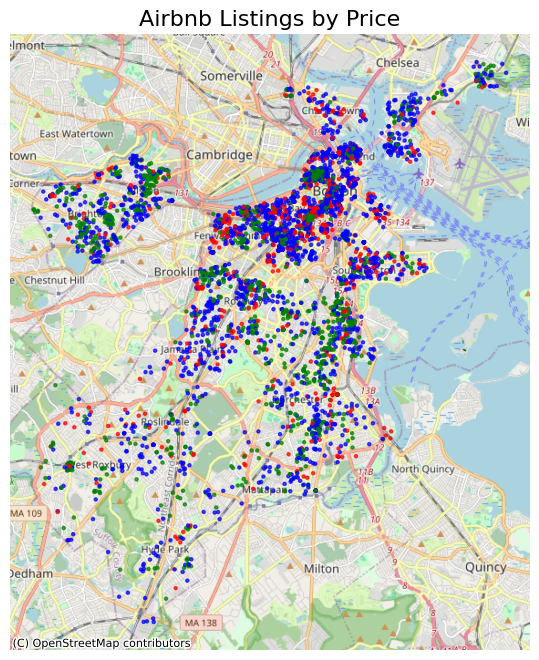

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=5, alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Airbnb Listings by Price", fontsize=16)
ax.set_axis_off()
plt.show()

### **Univariate Analysis**

In [30]:
listings.price.describe()

count     4426.000000
mean       176.374605
std        256.455625
min         25.000000
25%         98.000000
50%        135.000000
75%        186.000000
max      10000.000000
Name: price, dtype: float64

### **Detecting outliers in the price column**

In [33]:
import seaborn as sns #type:ignore
import matplotlib.pyplot as plt #type:ignore

In [36]:
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = listings[(listings['price'] < lower_bound) | (listings['price'] > upper_bound)]
print(f"Number of outliers in 'price': {len(outliers)}")
print(outliers['price'].describe())
listings_cleaned = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)]

Number of outliers in 'price': 418
count      418.000000
mean       574.461722
std        698.219173
min        319.000000
25%        381.250000
50%        425.000000
75%        581.000000
max      10000.000000
Name: price, dtype: float64


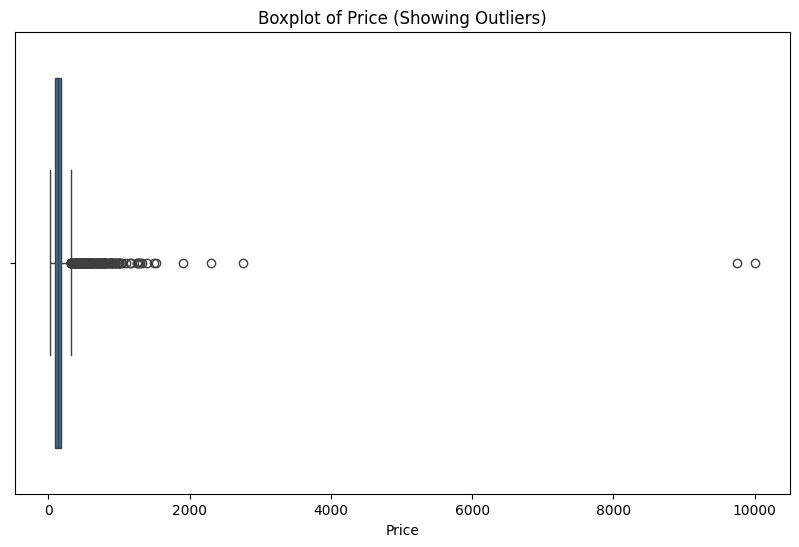

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=listings['price'])
plt.title('Boxplot of Price (Showing Outliers)')
plt.xlabel('Price')
plt.show()

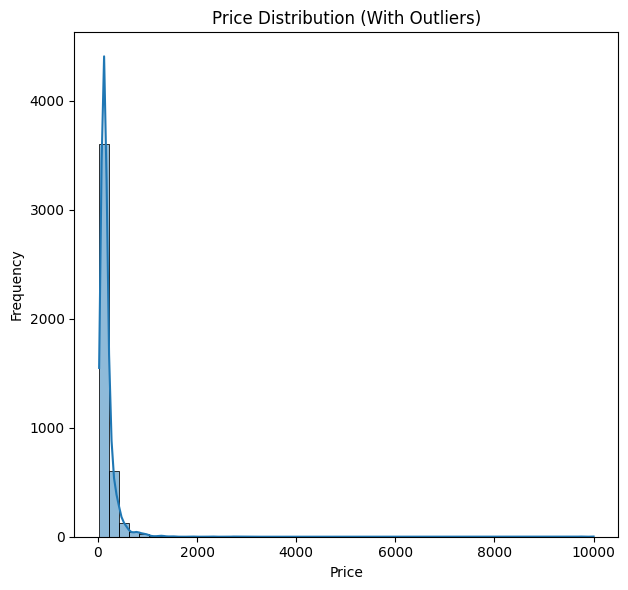

In [41]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Price Distribution (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

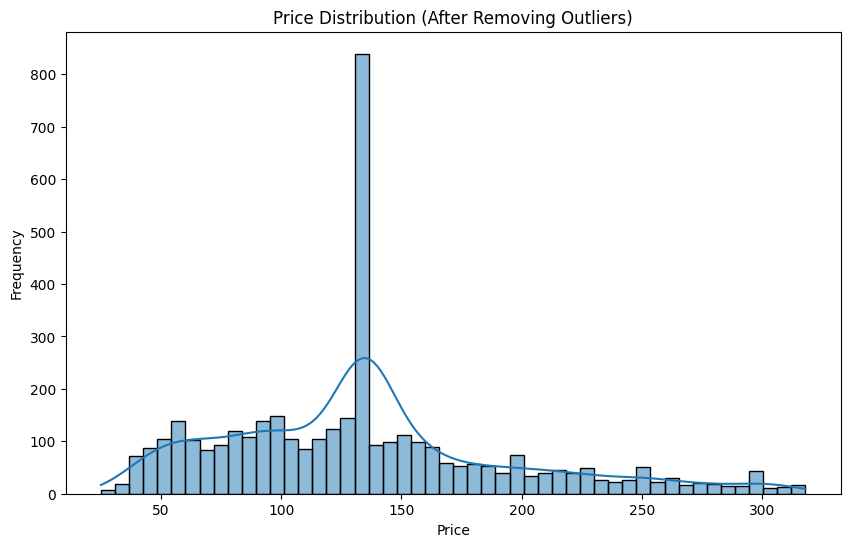

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Removing Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

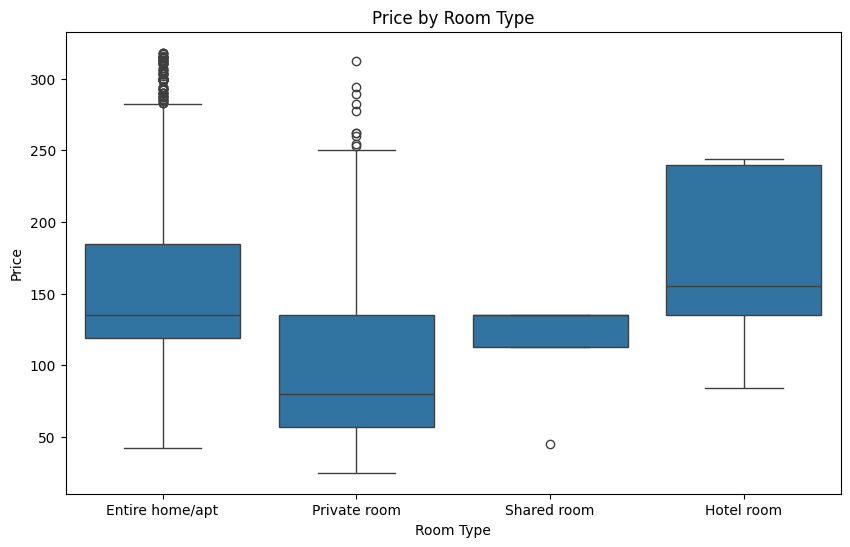

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_cleaned)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show() 
  

### **BINS**
Bins are essential for transforming raw data into a meaningful and interpretable visual representation, enabling effective data analysis and decision-making.

In [50]:
import numpy as np #type:ignore

In [51]:
def calculate_bins(data, method='sturges'):
    """
    Calculate the number of bins for a histogram based on the specified method.

    Parameters:
        data (array-like): The dataset for which bins are to be calculated.
        method (str): The method to use for calculating bins. Options are:
                      - 'sturges' (default): Sturges' Rule
                      - 'sqrt': Square Root Rule
                      - 'fd': Freedman-Diaconis Rule

    Returns:
        int: The number of bins.
    """
    n = len(data)  
    
    if method == 'sturges':
        
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
       
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
    
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [52]:
sbins       = calculate_bins(listings_cleaned.price , method = 'sturges')
sqrt_bins   = calculate_bins(listings_cleaned.price , method = 'sqrt')
fd_bins     = calculate_bins(listings_cleaned.price , method = 'fd')

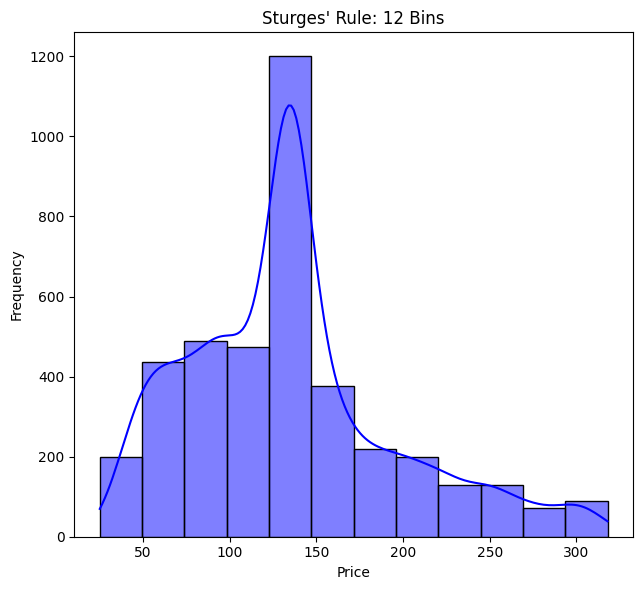

In [58]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(listings_cleaned.price, bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

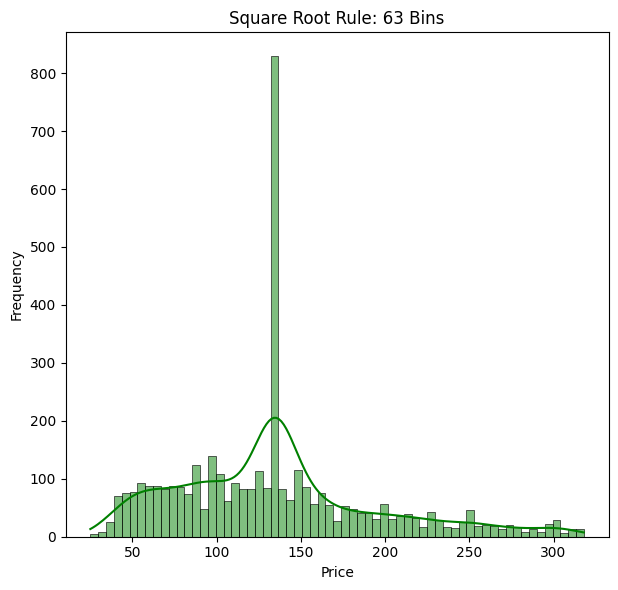

In [59]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 2)
sns.histplot(listings_cleaned.price, bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

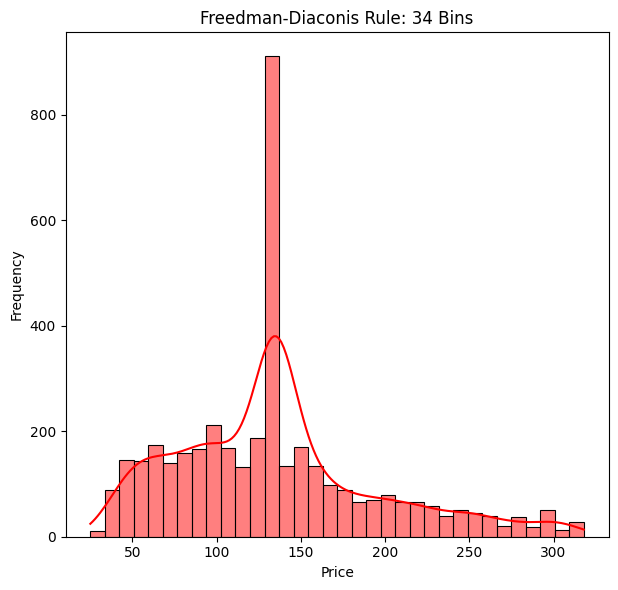

In [60]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 3)
sns.histplot(listings_cleaned.price, bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

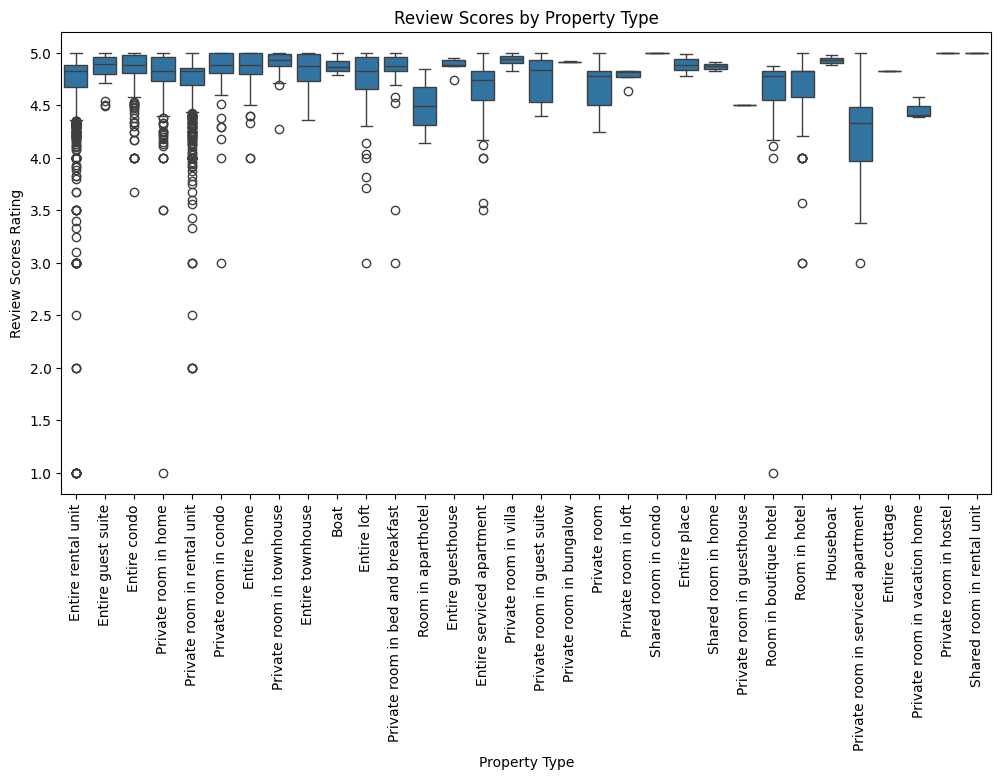

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='review_scores_rating', data=listings_cleaned)
plt.title('Review Scores by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Review Scores Rating')
plt.xticks(rotation=90)
plt.show()

### **Multivariate Analysis**

In [45]:
import seaborn as sns #type:ignore
import matplotlib.pyplot as plt #type:ignore

In [47]:
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

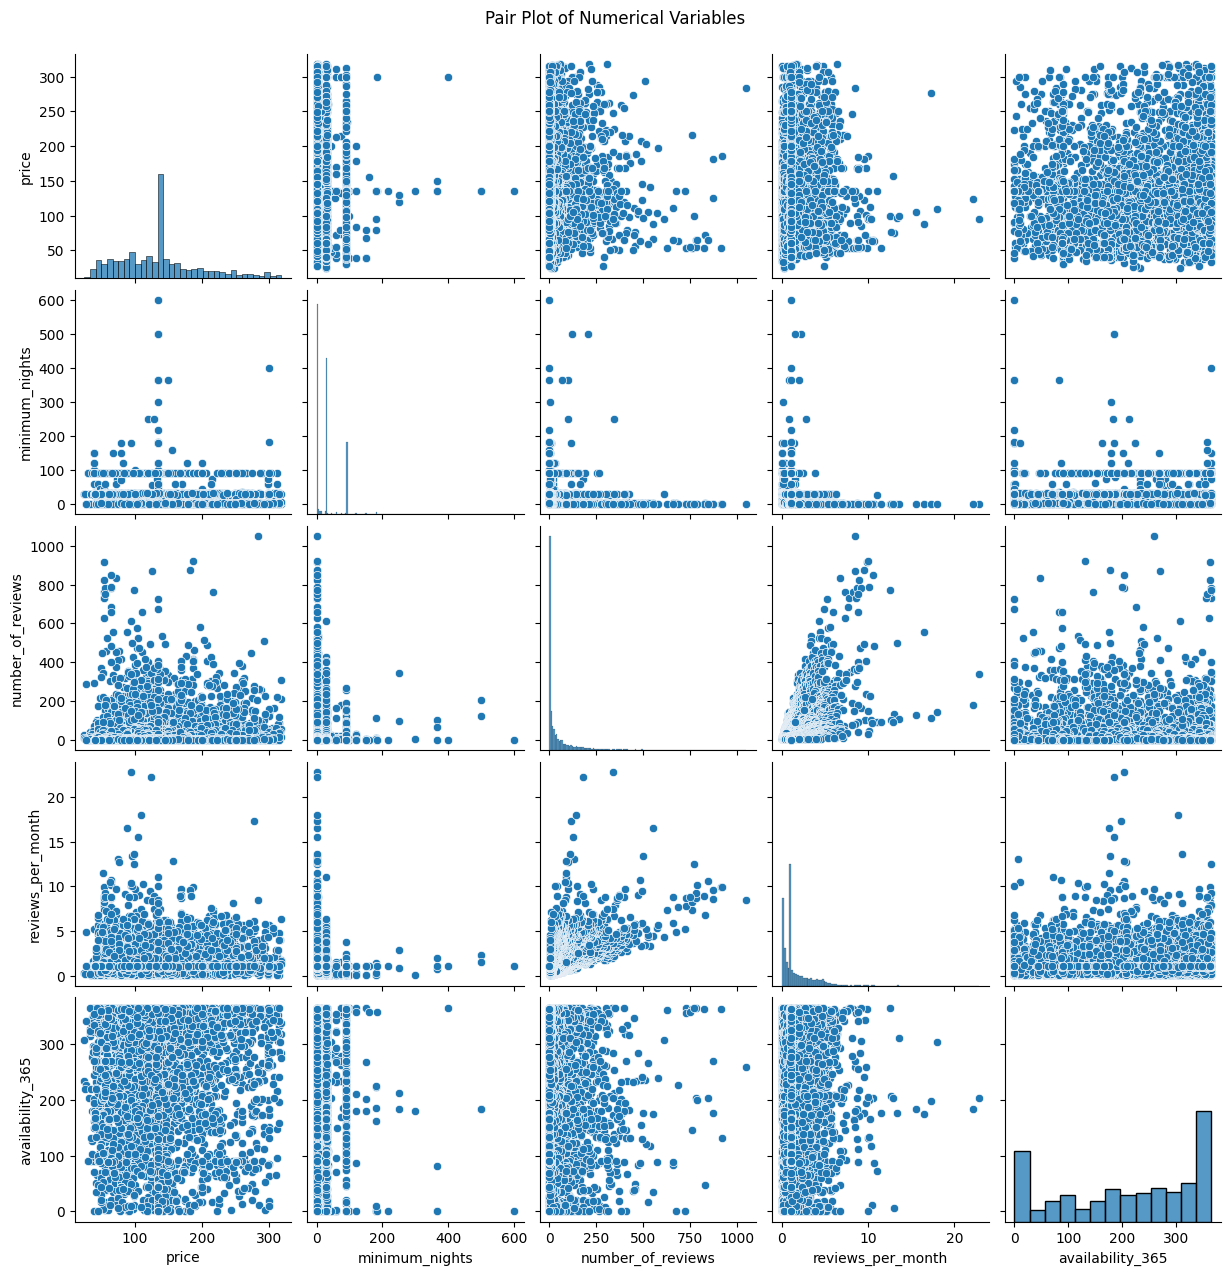

In [48]:
sns.pairplot(listings_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

### **Calculate correlation matrix**

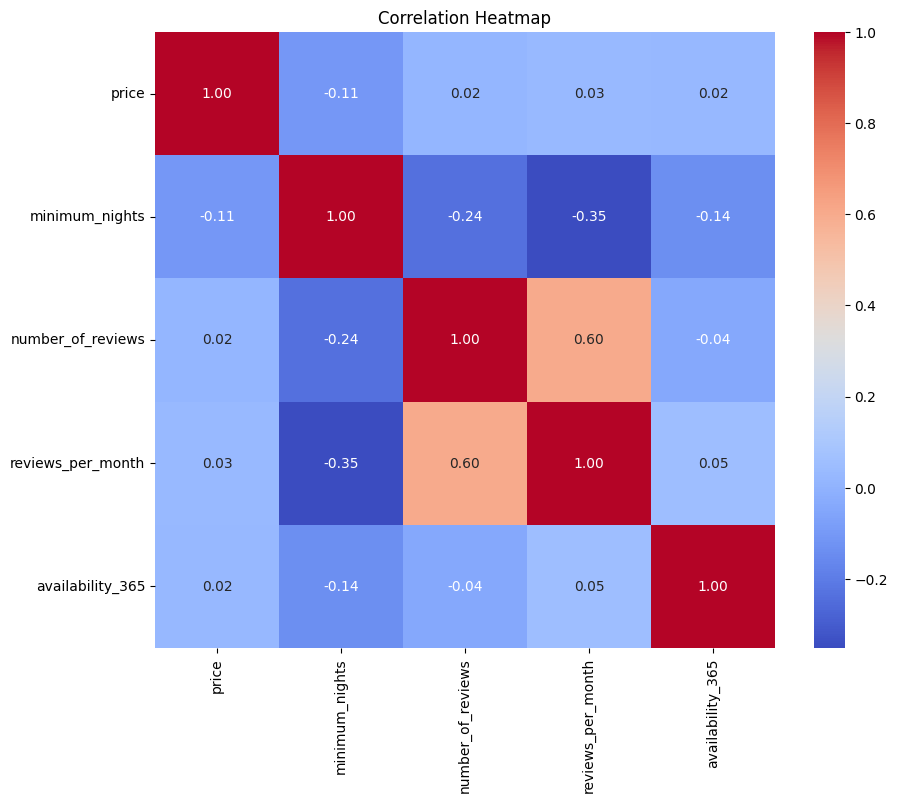

In [49]:
corr_matrix = listings_cleaned[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()